# **Importing Dependencies**

In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading file**

In [2]:
df = pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df.shape

(40949, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# **Data Cleaning & Preprocessing**

## **Handling null values**

In [5]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

### Removing two columns

In [6]:
df = df.drop(columns = ['thumbnail_link', 'description'])
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

In [7]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  comments_disabled       40949 non-null  bool  
 12  ratings_disabled        40949 non-null  bool  
 13  video_error_or_removed  40949 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.6+ MB


# **Handling duplicate records**

In [9]:
df.duplicated().sum()

48

In [10]:
df.drop_duplicates(inplace=True)  #Dropping duplicates

In [11]:
df.shape

(40901, 14)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [14]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m') # Changing datatype of Trending date column from object to date
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [15]:
df['publish_time'] = pd.to_datetime(df['publish_time']) # Changing datatype of Publish time  column from object to datetime
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


# **Creating New Columns**

In [16]:
# Extracting month, year, day, and hour from Published time
df['published_month'] = df['publish_time'].dt.month
df['published_day'] = df['publish_time'].dt.day
df['published_hour'] = df['publish_time'].dt.hour
df['published_year'] =  df['publish_time'].dt.year
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_month,published_day,published_hour,published_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,2017


In [17]:
print(sorted(df["category_id"].unique()))

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


# **Giving Category Names**

In [18]:
df.loc[(df["category_id"] == 1), "category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2), "category_name"] = 'Autos and Vehicles'
df.loc[(df["category_id"] == 10), "category_name"] = 'Music'
df.loc[(df["category_id"] == 15), "category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17), "category_name"] = 'Sports'
df.loc[(df["category_id"] == 19), "category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20), "category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22), "category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23), "category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24), "category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25), "category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26), "category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27), "category_name"] = 'Education'
df.loc[(df["category_id"] == 28), "category_name"] = 'Science and Technlogy'
df.loc[(df["category_id"] == 29), "category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43), "category_name"] = 'Shows'
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_month,published_day,published_hour,published_year,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,2017,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,2017,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,2017,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,2017,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,2017,Entertainment


# **Formatting Column Names**

In [19]:
df.columns = [x.title() for x in df.columns]
df.columns

Index(['Video_Id', 'Trending_Date', 'Title', 'Channel_Title', 'Category_Id',
       'Publish_Time', 'Tags', 'Views', 'Likes', 'Dislikes', 'Comment_Count',
       'Comments_Disabled', 'Ratings_Disabled', 'Video_Error_Or_Removed',
       'Published_Month', 'Published_Day', 'Published_Hour', 'Published_Year',
       'Category_Name'],
      dtype='object')

In [20]:
df.shape

(40901, 19)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Video_Id                40901 non-null  object             
 1   Trending_Date           40901 non-null  datetime64[ns]     
 2   Title                   40901 non-null  object             
 3   Channel_Title           40901 non-null  object             
 4   Category_Id             40901 non-null  int64              
 5   Publish_Time            40901 non-null  datetime64[ns, UTC]
 6   Tags                    40901 non-null  object             
 7   Views                   40901 non-null  int64              
 8   Likes                   40901 non-null  int64              
 9   Dislikes                40901 non-null  int64              
 10  Comment_Count           40901 non-null  int64              
 11  Comments_Disabled       40901 non-null  b

In [22]:
df.isnull().sum()

Video_Id                  0
Trending_Date             0
Title                     0
Channel_Title             0
Category_Id               0
Publish_Time              0
Tags                      0
Views                     0
Likes                     0
Dislikes                  0
Comment_Count             0
Comments_Disabled         0
Ratings_Disabled          0
Video_Error_Or_Removed    0
Published_Month           0
Published_Day             0
Published_Hour            0
Published_Year            0
Category_Name             0
dtype: int64

In [23]:
df.duplicated().sum()

0

# **Visualizations**

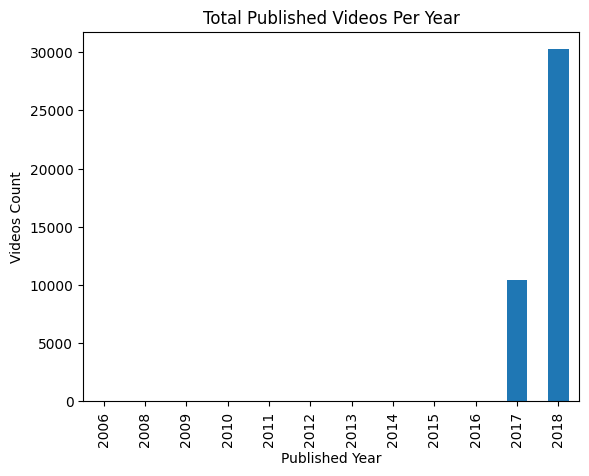

In [24]:

yearly_counts = df.groupby('Published_Year') ['Video_Id'].count()

#create a bar chart
yearly_counts.plot(kind='bar', xlabel='Published Year', ylabel='Videos Count', title='Total Published Videos Per Year')

#show chart
plt.show()

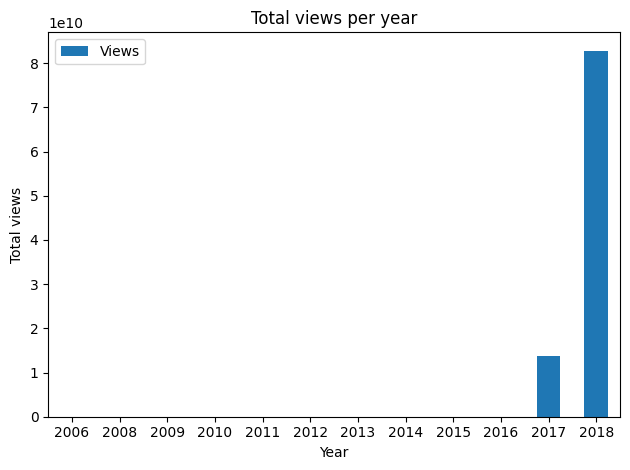

In [25]:
#group by year and sum the views for each year
yearly_views = df.groupby('Published_Year')['Views'].sum()

#Create a bar chart for calculating total views for year
yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total views', title='Total views per year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
#show the bar chart
plt.show()

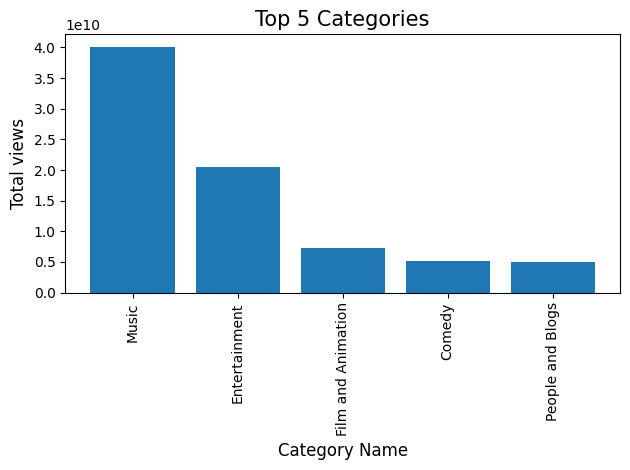

In [26]:
category_views = df.groupby('Category_Name')['Views'].sum().reset_index()

#Sort the categories by views in descending order
top_categories = category_views.sort_values(by='Views', ascending=False).head(5)

#create a bar plot to visualize the top 5 categories
plt.bar(top_categories['Category_Name'], top_categories['Views'])
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total views', fontsize=12)
plt.title('Top 5 Categories', fontsize= 15)
plt.xticks(rotation=90)  # Rotate x labels by 90 degrees
plt.tight_layout()
plt.show()

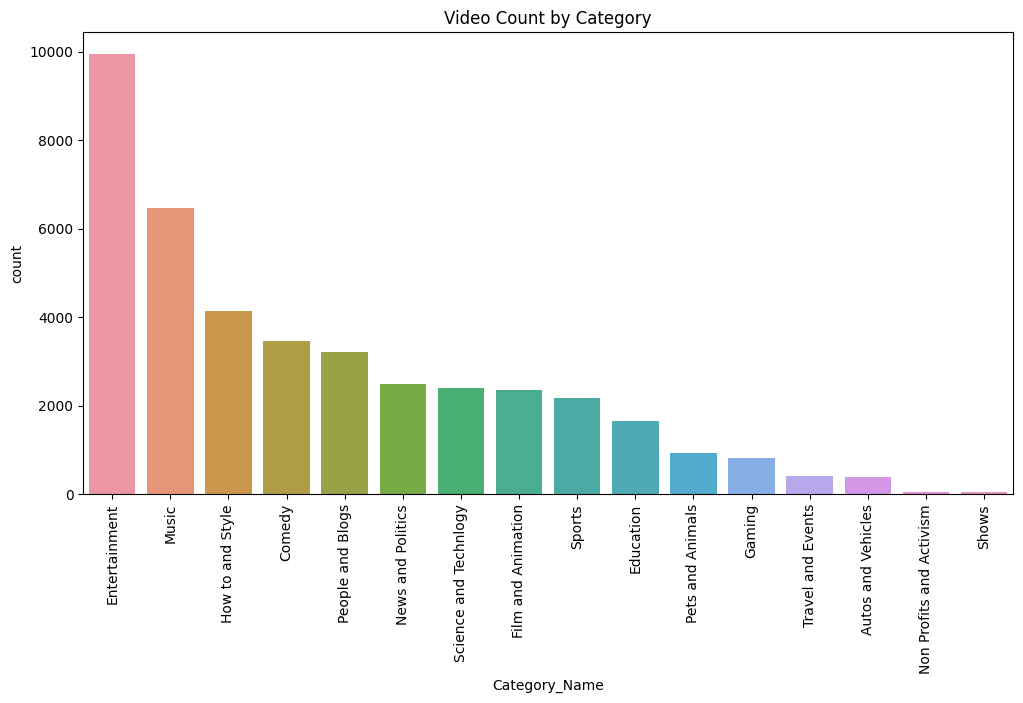

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category_Name', data=df, order=df['Category_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()

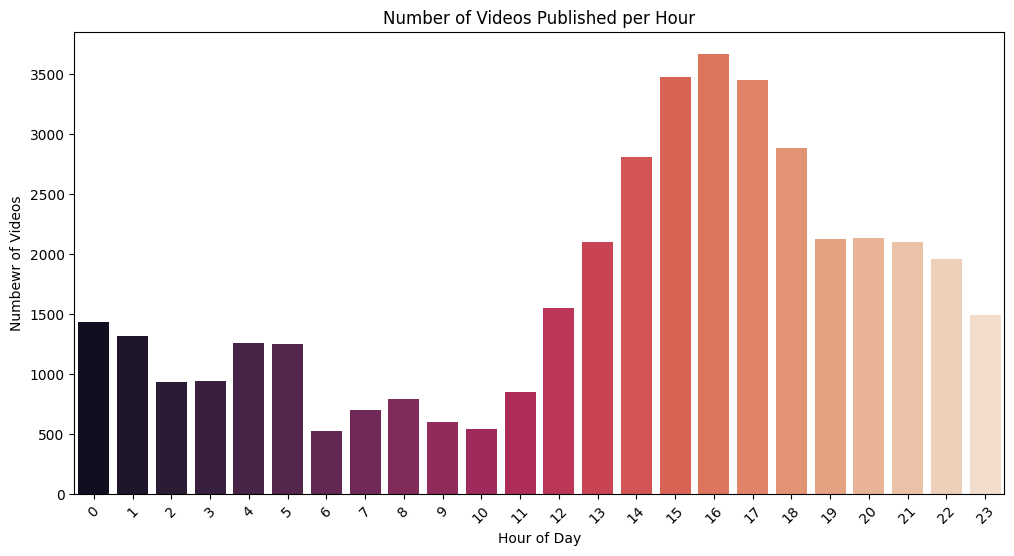

In [28]:
#Count the number of videos published per hour
videos_per_hour = df['Published_Hour'].value_counts().sort_index()

#create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='rocket')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

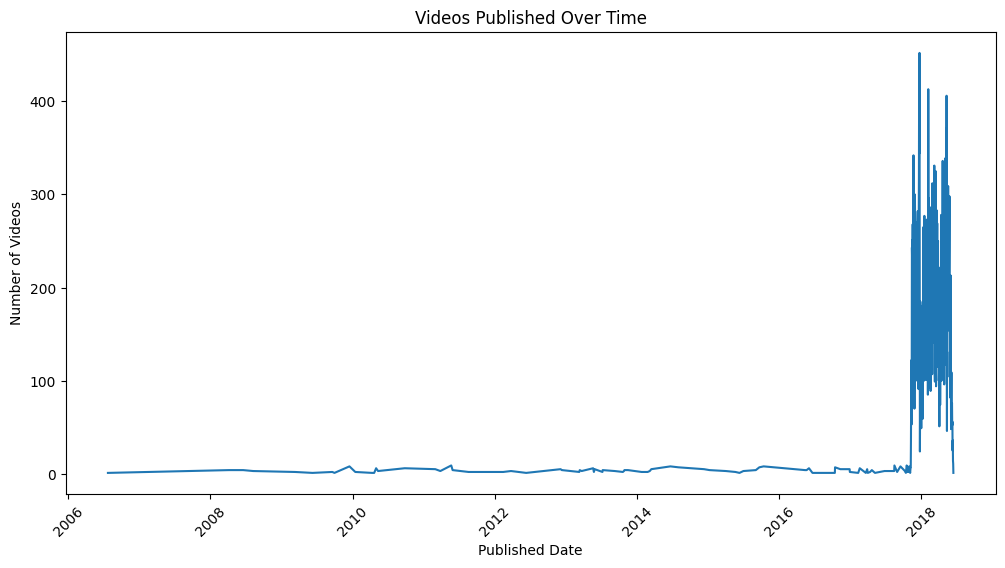

In [29]:
df['Publish_Time'] = pd.to_datetime(df['Publish_Time'])
df['Published_Date'] = df['Publish_Time'].dt.date
video_count_by_date = df.groupby('Published_Date').size()

plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title("Videos Published Over Time")
plt.xlabel('Published Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()


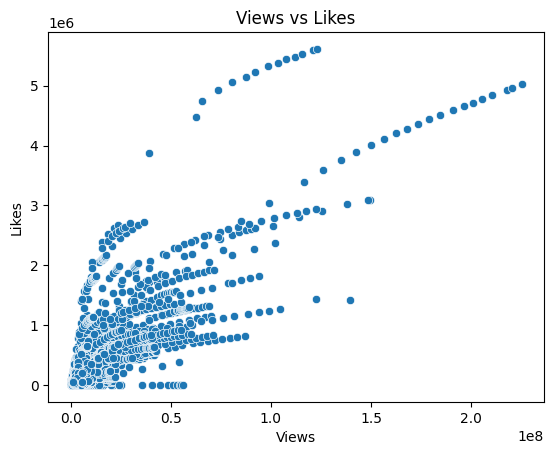

In [30]:
#scatter plot between 'views' and 'likes'
sns.scatterplot(data=df, x= 'Views', y= 'Likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

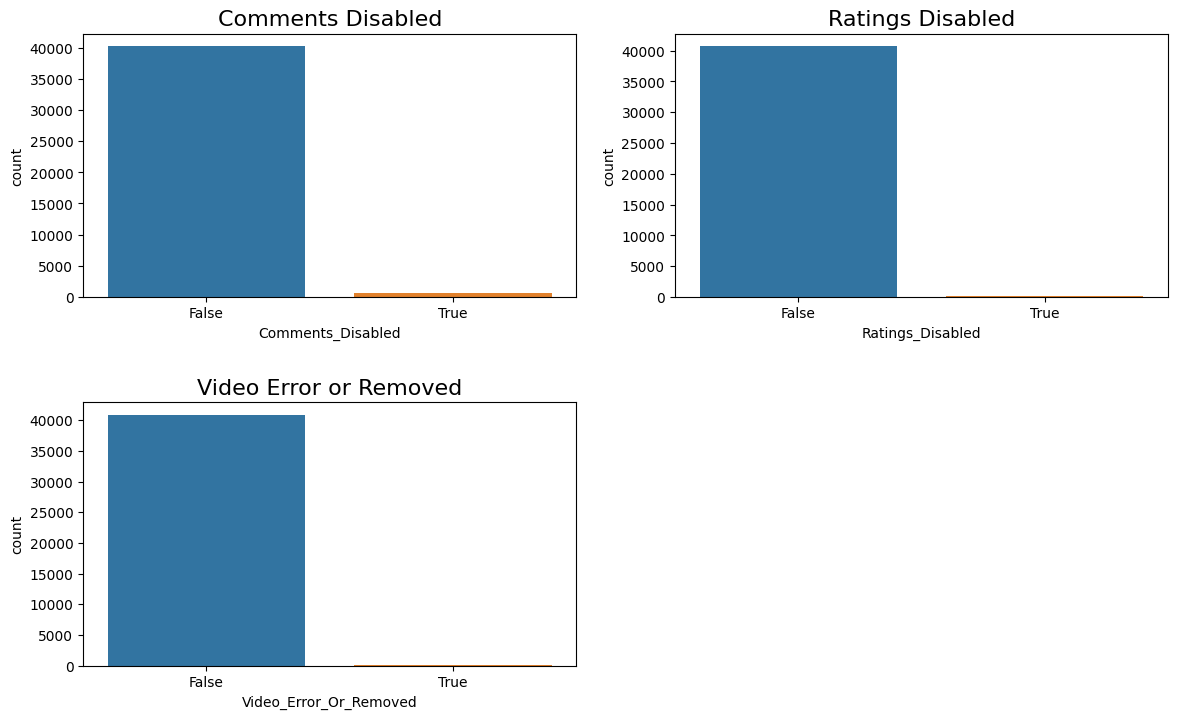

In [31]:
plt.figure(figsize= (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='Comments_Disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='Ratings_Disabled', data=df)
g1.set_title("Ratings Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='Video_Error_Or_Removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)


plt.show()

# **Identify Outliers**

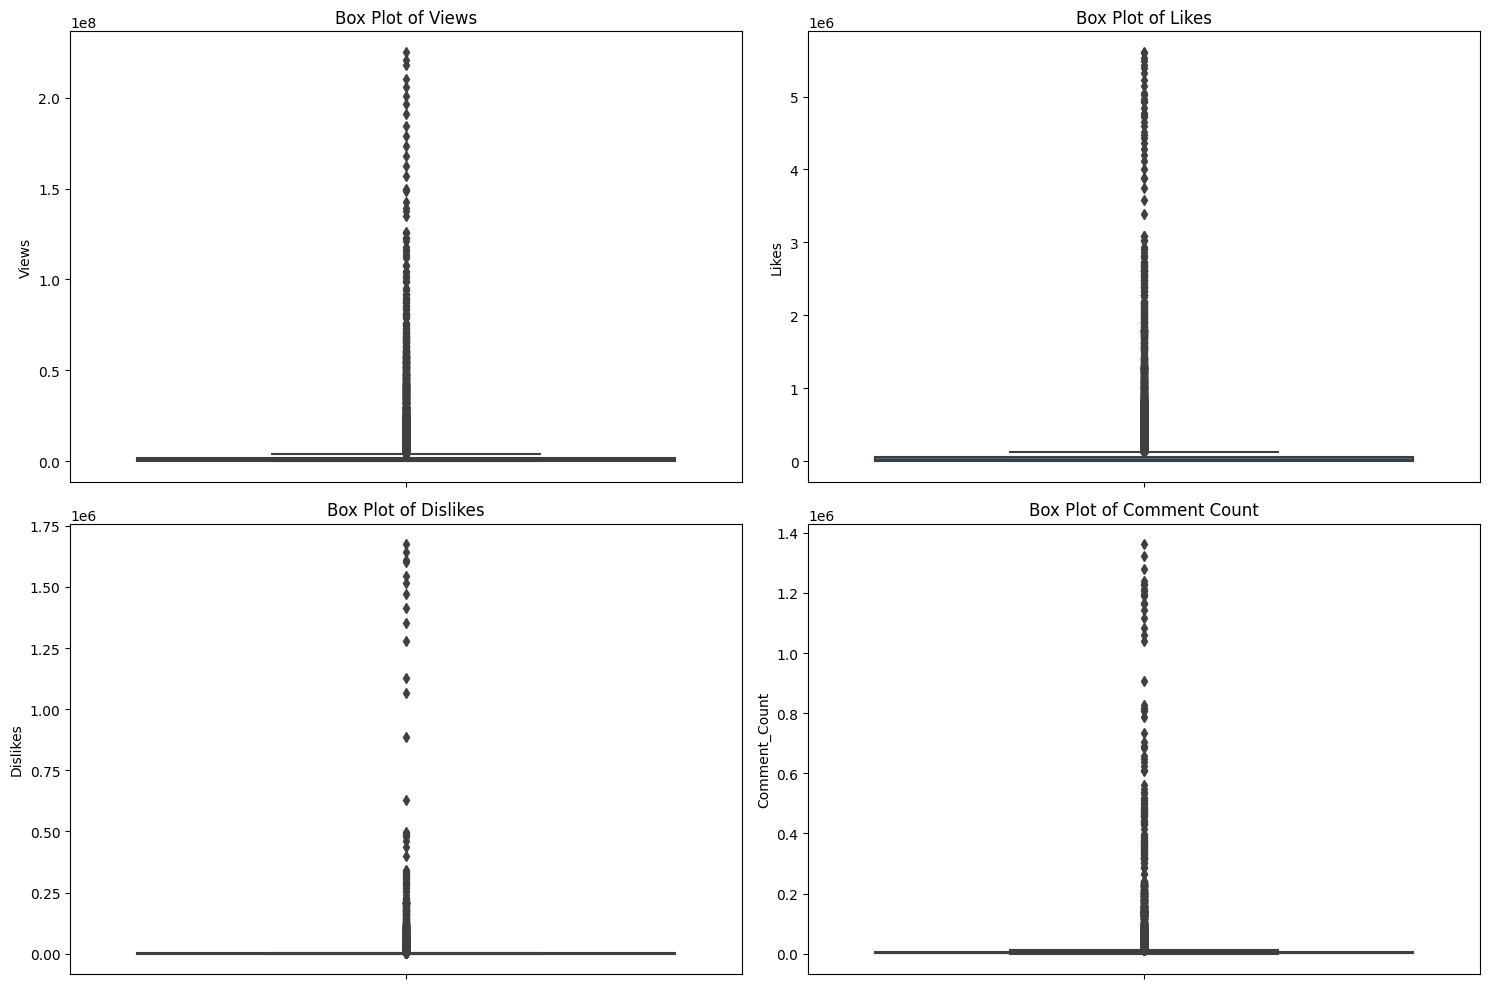

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for views
sns.boxplot(ax=axes[0, 0], data=df, y='Views')
axes[0, 0].set_title('Box Plot of Views')

# Box plot for likes
sns.boxplot(ax=axes[0, 1], data=df, y='Likes')
axes[0, 1].set_title('Box Plot of Likes')

# Box plot for dislikes
sns.boxplot(ax=axes[1, 0], data=df, y='Dislikes')
axes[1, 0].set_title('Box Plot of Dislikes')

# Box plot for comment count
sns.boxplot(ax=axes[1, 1], data=df, y='Comment_Count')
axes[1, 1].set_title('Box Plot of Comment Count')

plt.tight_layout()
plt.show()


# **Pair Plot for checking correlations**

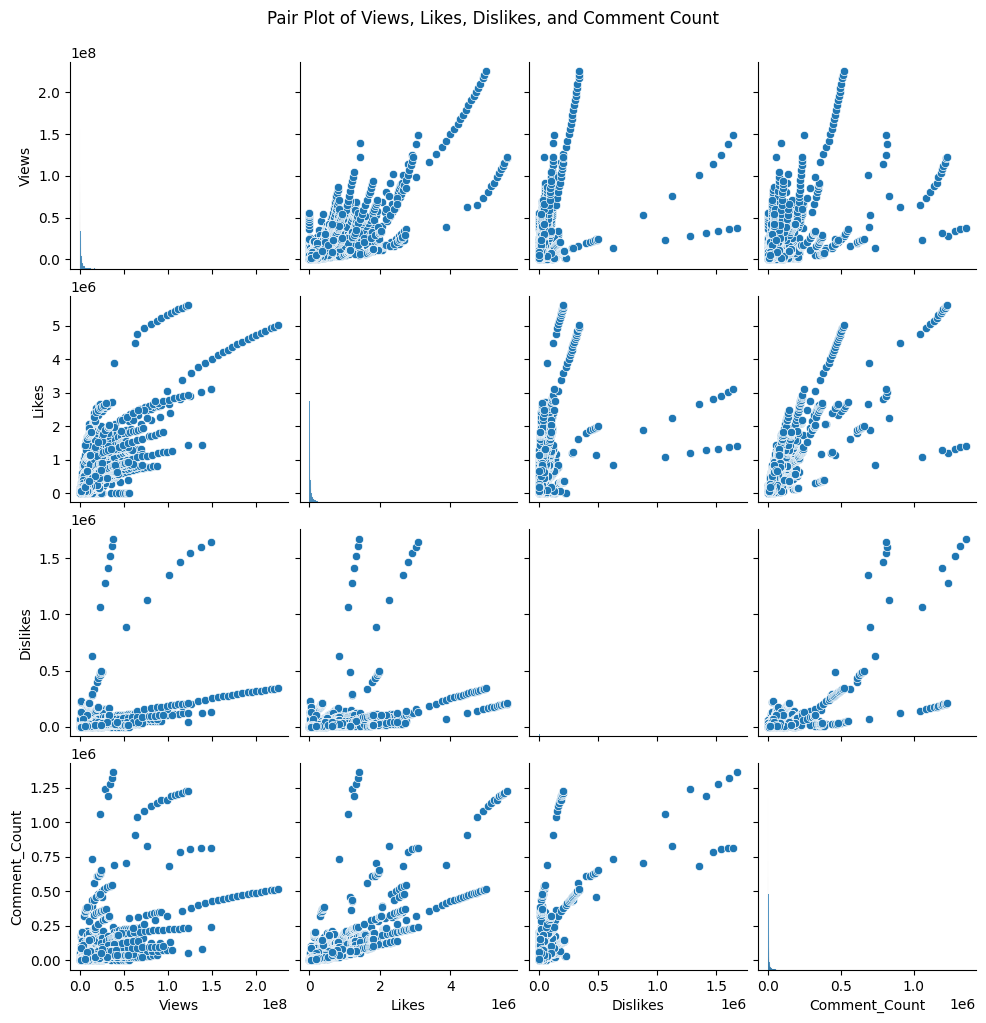

In [33]:
# Pair plot to check for correlations
sns.pairplot(df[['Views', 'Likes', 'Dislikes', 'Comment_Count']])
plt.suptitle('Pair Plot of Views, Likes, Dislikes, and Comment Count', y=1.02)
plt.show()

# **Correlation HeatMap**

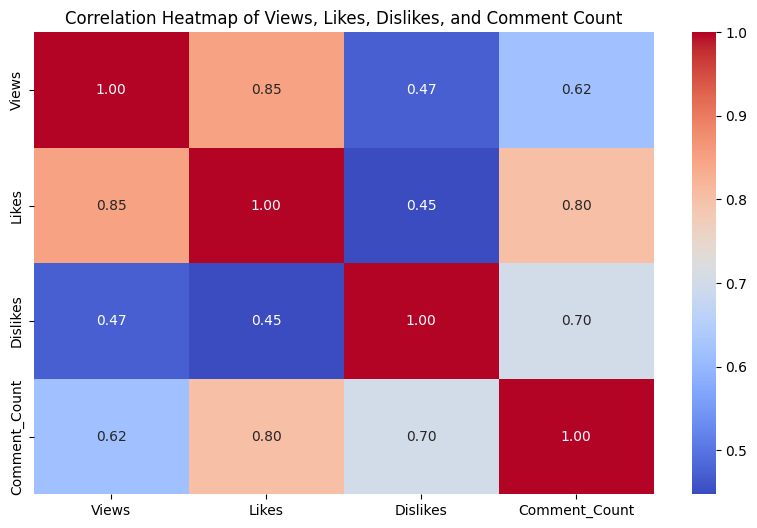

In [34]:

# Generate a correlation matrix
correlation_matrix = df[['Views', 'Likes', 'Dislikes', 'Comment_Count']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Views, Likes, Dislikes, and Comment Count')
plt.show()

# **Insights from Visualizations**

**Box Plots**

Views: The views distribution features significant outliers, with a few videos garnering extremely high view counts compared to most.

Likes: Like views, the likes distribution also has substantial outliers, showing that a small number of videos receive disproportionately high likes.

Dislikes: The dislikes distribution displays outliers as well, though they are less extreme compared to views and likes.

Comment Count: The comment count distribution reveals notable outliers, indicating that some videos attract significantly higher comment numbers.

**Pair Plot**

Views and Likes: There is a positive correlation between views and likes, suggesting that videos with more views tend to receive more likes.

Views and Dislikes: There is a weaker positive correlation between views and dislikes, indicating that more viewed videos also tend to attract more dislikes, though not as strongly as likes.

Views and Comment Count: There is a moderate positive correlation between views and comment count, meaning that more viewed videos usually have more comments.

Likes and Dislikes: There is a positive correlation between likes and dislikes, showing that videos receiving more likes also tend to receive more dislikes.

Likes and Comment Count: There is a strong positive correlation between likes and comment count, indicating that videos with more likes are likely to have more comments.

Dislikes and Comment Count: There is a positive correlation here too, with videos having more dislikes also receiving more comments.